In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

df = pd.read_csv("SocialNetworkAds.csv")

In [20]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


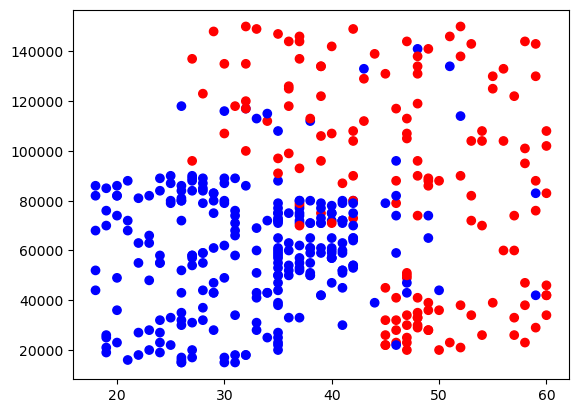

In [32]:
colors = ["red" if i == 1 else "blue" for i in df["Purchased"] ]
plt.scatter(df["Age"], df["EstimatedSalary"], color = colors)

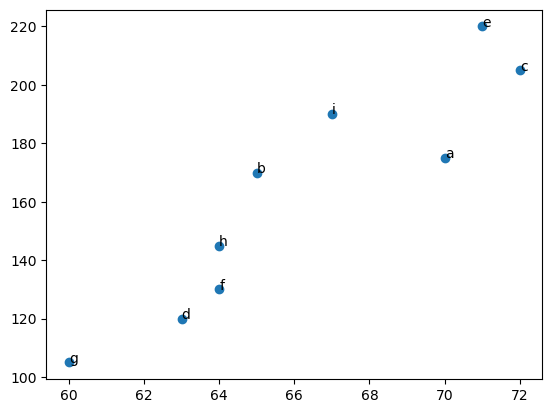

In [18]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

for label, friend, minute in zip(labels, friends, minutes):
    plt.annotate(label, xy= (friend, minute))
                
    